In [1]:
# Problem statement - To perform NLP & also conduct the sentiment analysis on Flipkart's product review dataset.

In [2]:
# Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [4]:
flipk = pd.read_csv('flipkart.csv')                                   # read the csv file

In [5]:
flipk.head(20)

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
5,5,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
6,6,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
7,7,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
8,8,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Amazing product,5
9,9,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Good for normal work , students, online classe...",3


In [6]:
flipk.Product_name.value_counts()

Product_name
realme C25_Y (Metal Grey, 64 GB)  (4 GB RAM)                                                                                                                                                   20
realme C25Y (Glacier Blue, 128 GB)  (4 GB RAM)                                                                                                                                                 20
realme C25_Y (Glacier Blue, 128 GB)  (4 GB RAM)                                                                                                                                                20
realme C25_Y (Glacier Blue, 64 GB)  (4 GB RAM)                                                                                                                                                 20
realme C21Y (Cross Black, 64 GB)  (4 GB RAM)                                                                                                                                                   20
                 

In [7]:
# 231 unique products are present in this dataset

In [8]:
flipk.Product_name.unique()

array(['Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop\xa0\xa0(15.6 inch, Shadow Black, 2.25$$kg kg)',
       'DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop\xa0\xa0(15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15ITL6 Thin and Light Laptop\xa0\xa0(15.6 inch, Arctic Grey, 1.65 kg, With MS Office)',
       'HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-dy3501TU Thin and Light Laptop\xa0\xa0(15.6 inch, Natural Silver, 1.75 kg, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) X515EA-EJ302TS Th

In [9]:
# Products belong to the 'electronics category' viz. smartphones, television sets, refrigerators, 
#                                                    laptops, monitors, power banks, etc.

In [10]:
# Emojis are present in the dataset. To remove them...

In [11]:
#pip install emoji

In [12]:
import emoji

In [13]:
flipk['Review'] = flipk['Review'].apply(lambda s: emoji.replace_emoji(s, ''))

In [14]:
flipk.head(20)

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
5,5,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
6,6,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
7,7,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
8,8,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Amazing product,5
9,9,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Good for normal work , students, online classe...",3


In [15]:
flipk = flipk.iloc[:,[-2,-1]]

In [16]:
flipk.head(10)

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product,5
4,"Light weight laptop with new amazing features,...",5
5,"Amazing laptop, am so much happy, thanks for F...",5
6,Over all a good laptop for personal use,5
7,Thank you so much Flipkart,4
8,Amazing product,5
9,"Good for normal work , students, online classe...",3


In [17]:
flipk.shape

(2304, 2)

In [18]:
flipk.isnull().sum()

Review    0
Rating    0
dtype: int64

In [19]:
flipk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2304 non-null   object
 1   Rating  2304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.1+ KB


In [20]:
flipk.Rating.value_counts()

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64

In [21]:
# Ratings reading:
# 1 = dissatisfied, 2 = neutral, 3 = satisfied

In [22]:
flipk.Rating.replace({2:1,3:2,4:2,5:3}, inplace=True)

In [23]:
flipk.Rating.value_counts()

Rating
3    1382
2     692
1     230
Name: count, dtype: int64

In [24]:
flipk.Review = flipk.Review.str.lower()                 # to ensure case uniformity 

In [25]:
flipk.head(10)

,Review,Rating
0,best under 60k great performancei got it for a...,3
1,good perfomence...,3
2,great performance but usually it has also that...,3
3,my wife is so happy and best product,3
4,"light weight laptop with new amazing features,...",3
5,"amazing laptop, am so much happy, thanks for f...",3
6,over all a good laptop for personal use,3
7,thank you so much flipkart,2
8,amazing product,3
9,"good for normal work , students, online classe...",2


In [26]:
# data is cleaned now.

In [27]:
# Preparing data for NLP -- removing punctuations and stopwords first

In [28]:
from nltk.corpus import stopwords

In [29]:
def text_process(review):
    no_punc = [char for char in review if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc if word not in stopwords.words('english')]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer(analyzer = text_process).fit(flipk['Review'])   #tokenization of each unique word

In [32]:
after_trans = cv.transform(flipk['Review'])    #transforming into TDM (Term Document Matrix)

In [33]:
after_trans.shape[0]

2304

In [34]:
# Sampling 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_x, test_x, train_y, test_y = train_test_split(after_trans, flipk.Rating)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
# Model Building.. NB works well with NLP. Checking with various algorithms for best results..

In [39]:
# With Naive Bayes (NB):

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
nb = MultinomialNB()

In [42]:
nb.fit(train_x, train_y)

MultinomialNB()

In [43]:
pred = nb.predict(test_x)
pred

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [44]:
confusion_matrix(test_y, pred)           # poor performance for class 0 & 1

array([[  4,   2,  47],
       [  4,  20, 160],
       [  4,  28, 307]], dtype=int64)

In [45]:
#old confusion matrix for NB before making changes with Ratings card.

#array([[  1,   0,   3,   8,  35],
#       [  0,   0,   0,   0,   9],
#       [  0,   0,   4,   8,  23],
#       [  1,   0,   4,  31,  90],
#       [  1,   1,  21,  42, 294]], dtype=int64)

In [46]:
accuracy_score(test_y, pred)*100

57.46527777777778

In [47]:
# Using Support Vector Machine (SVM):

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()

In [50]:
svm.fit(train_x, train_y)

SVC()

In [51]:
pred = svm.predict(test_x)
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [52]:
confusion_matrix(test_y, pred)         # poor results for class 0 & 1

array([[  0,   0,  53],
       [  0,   0, 184],
       [  0,   0, 339]], dtype=int64)

In [53]:
accuracy_score(test_y, pred)*100

58.854166666666664

In [54]:
# Naive Bayes & SVM give good results when the data is a high dimensional data.
# Here, model on these 2 algorithms not giving good results (unbalanced model).
# Hence, we do not consider NB & SVM in this case.

In [55]:
# Using Decision Tree:

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(train_x, train_y)

DecisionTreeClassifier()

In [59]:
pred = dtc.predict(test_x)
pred

array([2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 3, 3, 1, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 2, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3,
       2, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 2, 1, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 1, 2, 2, 2, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2,

In [60]:
confusion_matrix(test_y, pred)                # DT model performing pretty well for all the classes

array([[ 39,   3,  11],
       [  7, 118,  59],
       [ 12,  49, 278]], dtype=int64)

In [61]:
accuracy_score(test_y, pred)*100

75.52083333333334

In [62]:
# Using Random Forest:

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()

In [65]:
rfc.fit(train_x, train_y)

RandomForestClassifier()

In [66]:
pred = rfc.predict(test_x)
pred

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2,
       3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [67]:
confusion_matrix(test_y, pred)                     # RF model also giving considerable results

array([[ 36,   3,  14],
       [  0,  97,  87],
       [  0,  18, 321]], dtype=int64)

In [68]:
accuracy_score(test_y, pred)*100

78.81944444444444

In [69]:
#Using Logistic Regression:

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logi = LogisticRegression()

In [72]:
logi.fit(train_x, train_y)

D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
pred = logi.predict(test_x)
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [74]:
accuracy_score(test_y, pred)*100

59.895833333333336

In [75]:
# Logistic Regression fails to converge the model, so we will not consider it here.

Random Forest works really well with accuracy score = 78.81 %

Decision Tree also works well with accuracy score = 75.52 %

In [76]:
# Now to do the sentiment analysis--

In [77]:
# Using pre-trained model 'TextBlob' :

In [78]:
from textblob import TextBlob

In [79]:
senti_list = []

for i in range(0, flipk.shape[0]):
    blob = TextBlob(flipk.iloc[i][0])
    polarity_score = blob.sentiment
    senti_list.append(polarity_score[0])

C:\Users\revad\AppData\Local\Temp\ipykernel_21152\357444770.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  blob = TextBlob(flipk.iloc[i][0])


In [80]:
flipk['Sentiment_Score'] = senti_list

In [81]:
flipk.head()

,Review,Rating,Sentiment_Score
0,best under 60k great performancei got it for a...,3,0.438788
1,good perfomence...,3,0.700000
2,great performance but usually it has also that...,3,0.183333
3,my wife is so happy and best product,3,0.900000
4,"light weight laptop with new amazing features,...",3,0.534091


In [82]:
# Using another pre-trained model 'Vader':

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [84]:
senti = SentimentIntensityAnalyzer()

In [85]:
senti_score = []

for i in range(0, flipk.shape[0]):
    sentim = senti.polarity_scores(flipk.iloc[i][0])
    score = sentim['compound']
    senti_score.append(score)

C:\Users\revad\AppData\Local\Temp\ipykernel_21152\2133877906.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentim = senti.polarity_scores(flipk.iloc[i][0])


In [86]:
len(senti_score)

2304

In [87]:
flipk['Sentiment_Vader'] = senti_score

In [88]:
flipk.head(20)

,Review,Rating,Sentiment_Score,Sentiment_Vader
0,best under 60k great performancei got it for a...,3,0.438788,0.9579
1,good perfomence...,3,0.700000,0.4404
2,great performance but usually it has also that...,3,0.183333,0.5789
3,my wife is so happy and best product,3,0.900000,0.8808
4,"light weight laptop with new amazing features,...",3,0.534091,0.8360
5,"amazing laptop, am so much happy, thanks for f...",3,0.533333,0.8988
6,over all a good laptop for personal use,3,0.350000,0.4404
7,thank you so much flipkart,2,0.200000,0.3612
8,amazing product,3,0.600000,0.5859
9,"good for normal work , students, online classe...",2,0.516667,0.7003


In [89]:
# Positive & negative sentiments:

In [90]:
flipk[flipk['Sentiment_Score'] > 0]

,Review,Rating,Sentiment_Score,Sentiment_Vader
0,best under 60k great performancei got it for a...,3,0.438788,0.9579
1,good perfomence...,3,0.700000,0.4404
2,great performance but usually it has also that...,3,0.183333,0.5789
3,my wife is so happy and best product,3,0.900000,0.8808
4,"light weight laptop with new amazing features,...",3,0.534091,0.8360
...,...,...,...,...
2298,"cool and best in below 9000 prize range ,go fo...",3,0.675000,0.8689
2299,"great display, accurate colours at this price ...",3,0.600000,0.6249
2300,superb monitor first brought 1 used for 2 mont...,3,0.625000,0.6249
2301,awesome,3,1.000000,0.6249


In [91]:
flipk[flipk['Sentiment_Score'] < 0]

,Review,Rating,Sentiment_Score,Sentiment_Vader
31,every thing is just fine but the tn display is...,3,-0.191667,-0.6527
39,display so bad quality and wifi connectivity i...,1,-0.500000,-0.8748
65,very bad experience,1,-0.910000,-0.5849
83,speakers are completely not working well.worst...,1,-0.025000,0.6124
132,giving this review after using for 7days:*slik...,2,-0.180804,0.1761
...,...,...,...,...
2174,i am very upset because monitor is coming with...,1,-0.290000,-0.7391
2175,1 year back my lenovo order not nice very bad ...,1,-0.403333,0.0944
2199,hdmi cable very poor quality,1,-0.520000,-0.5256
2214,as expected from dell,3,-0.100000,0.0000


In [92]:
flipk[flipk.Sentiment_Vader > 0]

,Review,Rating,Sentiment_Score,Sentiment_Vader
0,best under 60k great performancei got it for a...,3,0.438788,0.9579
1,good perfomence...,3,0.700000,0.4404
2,great performance but usually it has also that...,3,0.183333,0.5789
3,my wife is so happy and best product,3,0.900000,0.8808
4,"light weight laptop with new amazing features,...",3,0.534091,0.8360
...,...,...,...,...
2298,"cool and best in below 9000 prize range ,go fo...",3,0.675000,0.8689
2299,"great display, accurate colours at this price ...",3,0.600000,0.6249
2300,superb monitor first brought 1 used for 2 mont...,3,0.625000,0.6249
2301,awesome,3,1.000000,0.6249


In [93]:
flipk[flipk.Sentiment_Vader < 0]

,Review,Rating,Sentiment_Score,Sentiment_Vader
31,every thing is just fine but the tn display is...,3,-0.191667,-0.6527
38,nice product everything is okay but battery po...,2,0.025000,-0.0302
39,display so bad quality and wifi connectivity i...,1,-0.500000,-0.8748
50,read this if you're going to buy any laptopmy ...,2,0.350000,-0.3637
65,very bad experience,1,-0.910000,-0.5849
...,...,...,...,...
2174,i am very upset because monitor is coming with...,1,-0.290000,-0.7391
2176,"my eyes started getting strain, kind of pain, ...",1,0.600000,-0.5423
2199,hdmi cable very poor quality,1,-0.520000,-0.5256
2237,22mp68vq and 22mk600m both have same specifica...,3,0.180000,-0.3940


In [ ]:
# details..

In [94]:
flipk['Sentiment_Score'].describe()

count    2304.000000
mean        0.413692
std         0.336972
min        -1.000000
25%         0.248077
50%         0.445833
75%         0.625000
max         1.000000
Name: Sentiment_Score, dtype: float64

In [95]:
flipk['Sentiment_Vader'].describe()

count    2304.000000
mean        0.592566
std         0.463146
min        -0.966200
25%         0.440400
50%         0.792600
75%         0.926825
max         0.993400
Name: Sentiment_Vader, dtype: float64

In [96]:
# Plotting the sentiment analysis on a graph:

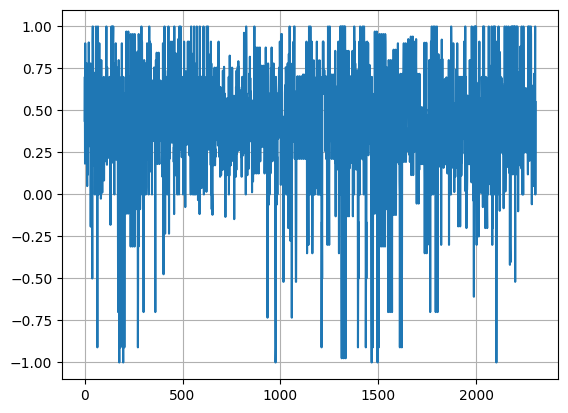

In [97]:
plt.plot(flipk.Sentiment_Score)
plt.grid()

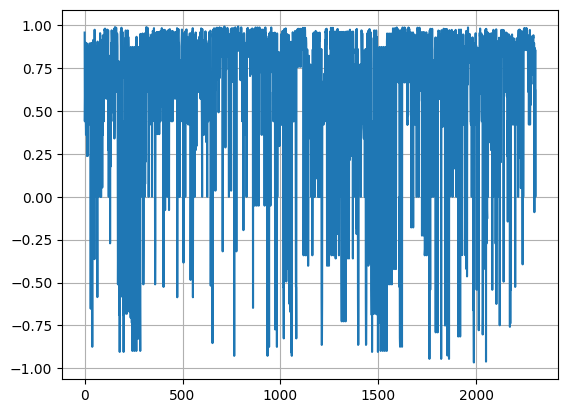

In [98]:
plt.plot(flipk.Sentiment_Vader)
plt.grid()

In [99]:
# High frequency words governing the analysis

In [100]:
from wordcloud import WordCloud

In [107]:
cloud = WordCloud(stopwords = stopwords.words('english'), max_words=40, random_state=123).generate(str(flipk.Review))

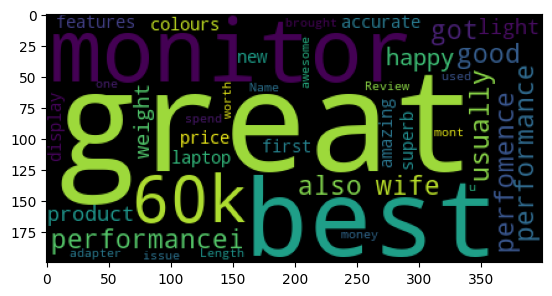

In [108]:
plt.imshow(cloud)

From the above analysis, it can be concluded that under the given dataset, there's a positive feedback for almost all electronic products sold on Flipkart.